# Operaciones CRUD en Riak con Python

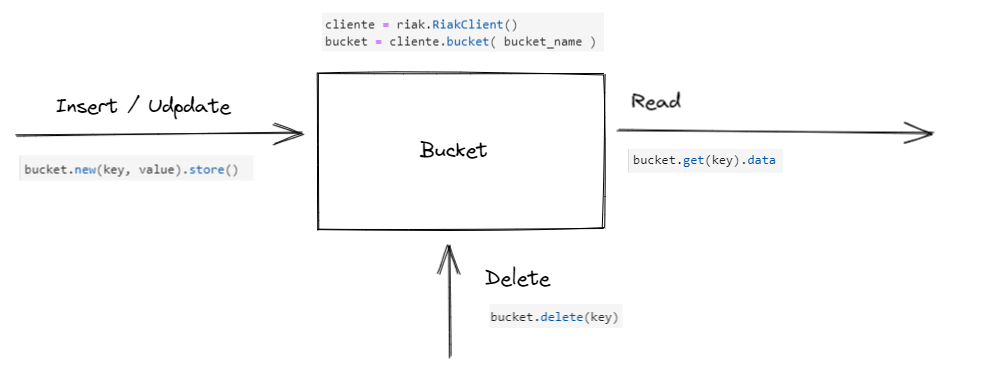

## Conexión a Riak

In [54]:
import riak

In [55]:
cliente = riak.RiakClient()
print("¿Está Riak disponible?", cliente.ping())

¿Está Riak disponible? True


In [56]:
!curl -s http://localhost:8098/stats  | jq .riak_kv_version

"2.1.7-0-gbd8e312"


## Insertar valores

In [80]:
bucket = cliente.bucket("bucket_name")

In [81]:
key1 = "key_one"
val1 = 1
bucket.new(key1, val1).store()

In [82]:
key2 = "key_two"
val2 = "Dos"
bucket.new(key2, val2).store()

In [60]:
key3 = "key_three"
val3 = {
    "val1" : 1,
    "val2" : "Dos",
    "val3" : [1, 2, 3, 4, 5],
    
}

In [83]:
bucket.new(key3, val3).store()

## Insertando imágenes

In [84]:
image_bucket = cliente.bucket('images')

image_bucket.new_from_file('image_key', './images/demo.image.jpg').store()

## Recuperando información

In [63]:
from pprintpp import pprint as pp
bucket = cliente.bucket("bucket_name")

print("key_one:", bucket.get("key_one").data)
print("key_two:", bucket.get("key_two").data)
data3 = bucket.get("key_three").data

print("key_three: ")
pp(data3)

key_one: 1
key_two: Dos
key_three: 
{'val1': 1, 'val2': 'Dos', 'val3': [1, 2, 3, 4, 5]}


In [64]:
!curl http://localhost:8098/riak/bucket_name/key_one

1

In [65]:
!curl http://localhost:8098/riak/bucket_name/key_two

"Dos"

In [66]:
!curl -s http://localhost:8098/riak/bucket_name/key_three | jq

{
  "val1": 1,
  "val2": "Dos",
  "val3": [
    1,
    2,
    3,
    4,
    5
  ]
}


http://localhost:8098/riak/images/image_key

## Actualizando Información

In [89]:
key1 = "key_one"
val1 = 2
bucket.new(key1, val1).store()

In [90]:
print("key_one:", bucket.get("key_one").data)

key_one: 2


## Borrando Información

In [69]:
key1 = "key_one"
bucket.delete(key1)

In [70]:
print("key_one:", bucket.get("key_one").data)

key_one: None


# Listado de valores en un Bucket

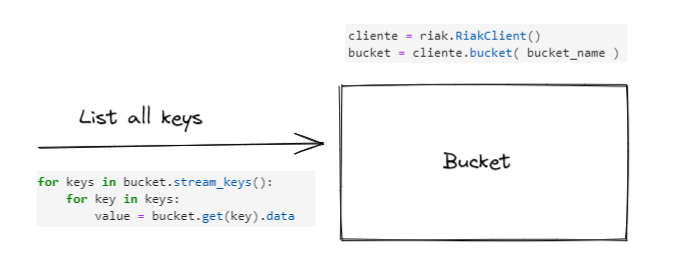

Riak devuelve un array con las claves. Nos corresponde a nosotros obtener el valor asociado a cada clave preguntando a la Base de datos

In [75]:
!curl --silent "http://localhost:8098/types/default/buckets/bucket_name/keys?keys=stream" | jq

{
  "keys": []
}
{
  "keys": []
}
{
  "keys": []
}
{
  "keys": []
}
{
  "keys": []
}
{
  "keys": []
}
{
  "keys": []
}
{
  "keys": []
}
{
  "keys": []
}
{
  "keys": [
    "key_three"
  ]
}
{
  "keys": []
}
{
  "keys": [
    "key_two"
  ]
}
{
  "keys": []
}
{
  "keys": []
}
{
  "keys": []
}
{
  "keys": []
}
{
  "keys": []
}
{
  "keys": []
}
{
  "keys": []
}
{
  "keys": []
}
{
  "keys": []
}
{
  "keys": []
}
{
  "keys": []
}


In [76]:
for keys in bucket.stream_keys():
    print("Keys: ", keys)
    for key in keys:
        value = bucket.get(key).data
        print('Key %s: %s' % (key, value))

Keys:  ['key_three']
Key key_three: {'val1': 1, 'val2': 'Dos', 'val3': [1, 2, 3, 4, 5]}
Keys:  ['key_two']
Key key_two: Dos
